Best parameters found:  {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 200, 'num_leaves': 100, 'verbosity': -1}
Accuracy: 0.96070
953.4125077724457


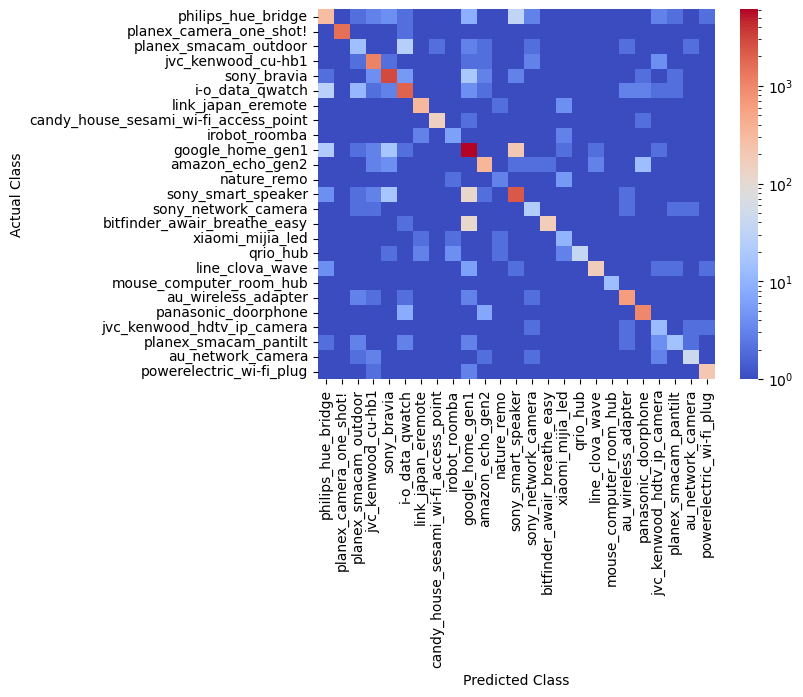

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov  6 13:53:28 2024

@author: camer
"""


import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from time import time
import numpy as np
start_time = time()
column_names = [
    "name", "start_date", "start_time", "duration", "reverseDelta", "IoTMac", "hostMac", 
    "IoTIP", "IoTIP_int", "hostIP", "hostIP_int", "ipProto", "IoTPort", "hostPort", 
    "PacketCount", "BytesCount", "reversePacketCount", "reverseBytesCount", "SmallPktCount", 
    "LargePktCount", "NonEmptyPktCount", "DataByteCount", "AvgIAT", "FirstNonEmptyPktSize", 
    "MaxPktSize", "StdevPayloadSize", "StdevIAT", "AvgPacketSize", "reverseSmallPktCount", 
    "reverseLargePktCount", "reverseNonEmptyPktCount", "reverseDataByteCount", "reverseAvgIAT", 
    "reverseFirstNonEmptyPktSize", "reverseMaxPktSize", "reverseStdevPayloadSize", "reverseStdevIAT", 
    "reverseAvgPacketSize", "reverseFlowExists", "remote", "broadcast", "HTTP", "HTTPS", "DNS", 
    "NTP", "TCP_others", "UDP_others", "year_month"
]

headers=["philips_hue_bridge",
"planex_camera_one_shot!",
"planex_smacam_outdoor",
"jvc_kenwood_cu-hb1",
"sony_bravia",
"i-o_data_qwatch",
"link_japan_eremote",
"candy_house_sesami_wi-fi_access_point",
"irobot_roomba",
"google_home_gen1",
"amazon_echo_gen2",
"nature_remo",
"sony_smart_speaker",
"sony_network_camera",
"bitfinder_awair_breathe_easy",
"xiaomi_mijia_led",
"qrio_hub",
"line_clova_wave",
"mouse_computer_room_hub",
"au_wireless_adapter",
"panasonic_doorphone",
"jvc_kenwood_hdtv_ip_camera",
"planex_smacam_pantilt",
"au_network_camera"
,"powerelectric_wi-fi_plug"
]

# Dropped dataset, IoTIP_int, hostIP_int, year_month
df2 = pd.read_csv('sample2.csv', names=column_names)
df = df2.drop(columns = ['name','IoTIP_int', 'hostIP_int', 'year_month'])
# Drop original date and time columns
df.drop(columns=['start_date', 'start_time', 'IoTIP', 'hostMac', 'hostIP'], inplace=True)

# Defines categorical variables
categories = ['IoTMac', 'ipProto', 'reverseFlowExists', 'remote', 'broadcast', 'HTTP', 'HTTPS', 'DNS', 'NTP', 'TCP_others', 'UDP_others']
for var in categories:
    df[var] = df[var].astype('category')

X = df.drop(columns=['IoTMac'])
y = df['IoTMac']

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

parameters = param_grid = {
    'num_leaves': [100],
    'max_depth': [20], # -1 means unlimited
    'learning_rate': [0.01],
    'n_estimators': [200],
    'verbosity': [-1] #silences warnings
}

grid = GridSearchCV(lgb.LGBMClassifier(random_state=42), param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1)
grid.fit(XTrain, yTrain)

bestParamsModel = grid.best_estimator_

bestParamsModel.fit(XTrain, yTrain)

yPred = bestParamsModel.predict(XTest)
accuracy = accuracy_score(yTest, yPred)

print("Best parameters found: ", grid.best_params_)
print(f'Accuracy: {accuracy:.5f}')
cmatrix = confusion_matrix(yTest, yPred)
for f in cmatrix:
    f += 1
import seaborn as sns
from matplotlib.colors import LogNorm
sns_map = sns.heatmap(cmatrix, annot=False, cmap='coolwarm', norm=LogNorm())
sns_map.set_xlabel('Predicted Class')
sns_map.set_ylabel('Actual Class')
sns_map.xaxis.set_ticklabels(headers)
sns_map.tick_params(axis='y',rotation=0)
sns_map.set_yticks(np.arange(25)+0.5)
sns_map.yaxis.set_ticklabels(headers)
#crosstab = pd.crosstab(y_test2,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)
print(time() - start_time)